In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timezone

In [2]:
def haversine(lat1, lon1, lat2, lon2, r=6378):
    
    # r is radius of Earth in km
    
    lat1 = np.deg2rad(lat1)
    lon1 = np.deg2rad(lon1)
    lat2 = np.deg2rad(lat2)
    lon2 = np.deg2rad(lon2)

    firstpart = np.sin((lat2-lat1)/2)**2
    secondpart = np.sin((lon2-lon1)/2)**2

    d = 2*r*np.arcsin(np.sqrt(firstpart+np.cos(lat1)*np.cos(lat2)*secondpart))

    return d

In [3]:
### Test Case
# The distance between Big Ben in London (51.5007° N, 0.1246° W) and The Statue of Liberty in 
# New York (40.6892° N, 74.0445° W) is 5574.8 km. This estimate uses r=6371

lat1, lon1 = 51.5007, 0.1246
lat2, lon2 = 40.6892, 74.0445

distance = haversine( lat1, lon1, lat2, lon2, r=6371 )
print( np.round(distance,1) )

5574.8


In [4]:
def processData( inDir, outDir, inFile, outFile, bsecFile ):
    
    # read the BSEC file with available stations
    bsec = pd.read_csv( bsecFile )
    
    # empty arrays to store data
    stationID = []
    tz = []
    obsTimeUtc = []
    obsTimeLocal = []
    epoch = [] 
    lat = []
    lon = []
    solarRadiationHigh = []
    uvHigh = []
    winddirAvg = []
    humidityHigh = []
    humidityLow = []
    humidityAvg = []
    qcStatus = [] 
    tempHigh = []
    tempLow = []
    tempAvg = []
    windspeedHigh = []
    windspeedLow = []
    windspeedAvg = []
    windgustHigh = []
    windgustLow = []
    windgustAvg = []
    dewptHigh = []
    dewptLow = []
    dewptAvg = []
    windchillHigh = []
    windchillLow = []
    windchillAvg = []
    heatindexHigh = []
    heatindexLow = []
    heatindexAvg = []
    pressureMax = []
    pressureMin = []
    pressureTrend = []
    precipRate = []
    precipTotal = []
    bsecDistance = []
    
    # read the LST data
    df = pd.read_csv( inDir + inFile )

    start = time.time()
    print("Working on:", inFile)
    print(" n Rows:", df.shape[0])

    # keep track of where we are
    tn = int(np.ceil(0.10 * df.shape[0]))
    tf = int(np.ceil(0.25 * df.shape[0]))
    fy = int(np.ceil(0.50 * df.shape[0]))
    sf = int(np.ceil(0.75 * df.shape[0]))
    ny = int(np.ceil(0.90 * df.shape[0]))

    # loop over all the LST rows
    for ix, row in df.iterrows():
        
        # print status
        if ( ix == tn ): print("   10% done...")
        if ( ix == tf ): print("   25% done...")
        if ( ix == fy ): print("   50% done...")
        if ( ix == sf ): print("   75% done...")
        if ( ix == ny ): print("   90% done...")
        
        # latitude and longitude of current LST value
        lat1, lon1 = float(row['lstLat']), float(row['lstLon'])
        
        # loop over all available AWS BSEC stations and find the closest
        distance = 9999
        closestBSEC = ''
        for ix2, row2 in bsec.iterrows():

            lat2 = float(row2['bsecLat'])
            lon2 = float(row2['bsecLon'])
            site = row2['stationID'] 
            d = haversine(lat1, lon1, lat2, lon2)
            if ( d < distance ):
                distance = d
                closestBSEC = site
        
        # get data from closest BSEC station
        row = bsec[ bsec['stationID'] == closestBSEC ]
    
        # extract data from BSEC closest row
        bsecDistance.append( distance )
        stationID.append( row['stationID'].iloc[0] )
        tz.append( row['tz'].iloc[0] )
        obsTimeUtc.append( row['obsTimeUtc'].iloc[0] )
        obsTimeLocal.append( row['obsTimeLocal'].iloc[0] )
        epoch.append( row['epoch'].iloc[0] )
        lat.append( row['bsecLat'].iloc[0] )
        lon.append( row['bsecLon'].iloc[0] )
        solarRadiationHigh.append( row['solarRadiationHigh'].iloc[0] )
        uvHigh.append( row['uvHigh'].iloc[0] )
        winddirAvg.append( row['winddirAvg'].iloc[0] )
        humidityHigh.append( row['humidityHigh'].iloc[0] )
        humidityLow.append( row['humidityLow'].iloc[0] )
        humidityAvg.append( row['humidityAvg'].iloc[0] )
        qcStatus.append( row['qcStatus'].iloc[0] ) 
        tempHigh.append( row['tempHigh'].iloc[0] )
        tempLow.append( row['tempLow'].iloc[0] )
        tempAvg.append( row['tempAvg'].iloc[0] )
        windspeedHigh.append( row['windspeedHigh'].iloc[0] )
        windspeedLow.append( row['windspeedLow'].iloc[0] )
        windspeedAvg.append( row['windspeedAvg'].iloc[0] )
        windgustHigh.append( row['windgustHigh'].iloc[0] )
        windgustLow.append( row['windgustLow'].iloc[0] )
        windgustAvg.append( row['windgustAvg'].iloc[0] )
        dewptHigh.append( row['dewptHigh'].iloc[0] )
        dewptLow.append( row['dewptLow'].iloc[0] )
        dewptAvg.append( row['dewptAvg'].iloc[0] )
        windchillHigh.append( row['windchillHigh'].iloc[0] )
        windchillLow.append( row['windchillLow'].iloc[0] )
        windchillAvg.append( row['windchillAvg'].iloc[0] )
        heatindexHigh.append( row['heatindexHigh'].iloc[0] )
        heatindexLow.append( row['heatindexLow'].iloc[0] )
        heatindexAvg.append( row['heatindexAvg'].iloc[0] )
        pressureMax.append( row['pressureMax'].iloc[0] )
        pressureMin.append( row['pressureMin'].iloc[0] )
        pressureTrend.append( row['pressureTrend'].iloc[0] )
        precipRate.append( row['precipRate'].iloc[0] )
        precipTotal.append( row['precipTotal'].iloc[0] )

    end = time.time()
    print("     Elapsed time (minutes):", np.round((end-start)/60.,2) )
    print("     df rows:", df.shape[0])
    print("     csv rows:", len(precipTotal))
    print()

    df['stationID'] = stationID
    df['tz'] = tz 
    df['obsTimeUtc'] = obsTimeUtc 
    df['obsTimeLocal'] = obsTimeLocal 
    df['epoch'] = epoch 
    df['bsecLat'] = lat 
    df['bsecLon'] = lon 
    df['bsecDistance'] = bsecDistance
    df['solarRadiationHigh'] = solarRadiationHigh 
    df['uvHigh'] = uvHigh 
    df['winddirAvg'] = winddirAvg 
    df['humidityHigh'] = humidityHigh 
    df['humidityLow'] = humidityLow 
    df['humidityAvg'] = humidityAvg 
    df['qcStatus'] = qcStatus 
    df['tempHigh'] = tempHigh 
    df['tempLow'] = tempLow 
    df['tempAvg'] = tempAvg 
    df['windspeedHigh'] = windspeedHigh 
    df['windspeedLow'] = windspeedLow 
    df['windspeedAvg'] = windspeedAvg 
    df['windgustHigh'] = windgustHigh 
    df['windgustLow'] = windgustLow 
    df['windgustAvg'] = windgustAvg 
    df['dewptHigh'] = dewptHigh 
    df['dewptLow'] = dewptLow 
    df['dewptAvg'] = dewptAvg 
    df['windchillHigh'] = windchillHigh 
    df['windchillLow'] = windchillLow 
    df['windchillAvg'] = windchillAvg 
    df['heatindexHigh'] = heatindexHigh 
    df['heatindexLow'] = heatindexLow 
    df['heatindexAvg'] = heatindexAvg 
    df['pressureMax'] = pressureMax 
    df['pressureMin'] = pressureMin 
    df['pressureTrend'] = pressureTrend 
    df['precipRate'] = precipRate 
    df['precipTotal'] = precipTotal

    df.to_pickle(outDir + outFile)

In [5]:
inDir = "../Data/LST/"
outDir = "../Results/"

inFiles = ['LST_2023-07-14.csv',
           'LST_2023-07-30.csv',
           'LST_2023-08-23.csv',
           'LST_2023-08-31.csv']

# 1-hour before Landsat
outFiles = ['ML_2023-07-14_1HR.pkl',
            'ML_2023-07-30_1HR.pkl',
            'ML_2023-08-23_1HR.pkl',
            'ML_2023-08-31_1HR.pkl']

bsecFiles = [outDir + 'BSEC_Data_1Hour_Prior_07_14_2023.csv',
             outDir + 'BSEC_Data_1Hour_Prior_07_30_2023.csv',
             outDir + 'BSEC_Data_1Hour_Prior_08_23_2023.csv',
             outDir + 'BSEC_Data_1Hour_Prior_08_31_2023.csv']

In [6]:
n = len(inFiles)
for i in range(n):
    processData( inDir, outDir, inFiles[i], outFiles[i], bsecFiles[i] )

Working on: LST_2023-07-14.csv
 n Rows: 26444
   10% done...
   25% done...
   50% done...
   75% done...
   90% done...
     Elapsed time (minutes): 0.54
     df rows: 26444
     csv rows: 26444

Working on: LST_2023-07-30.csv
 n Rows: 228507
   10% done...
   25% done...
   50% done...
   75% done...
   90% done...
     Elapsed time (minutes): 4.77
     df rows: 228507
     csv rows: 228507

Working on: LST_2023-08-23.csv
 n Rows: 181800
   10% done...
   25% done...
   50% done...
   75% done...
   90% done...
     Elapsed time (minutes): 3.8
     df rows: 181800
     csv rows: 181800

Working on: LST_2023-08-31.csv
 n Rows: 232558
   10% done...
   25% done...
   50% done...
   75% done...
   90% done...
     Elapsed time (minutes): 4.7
     df rows: 232558
     csv rows: 232558



### Read one of the output files to make sure everyting worked

In [7]:
test = pd.read_pickle(outDir + outFiles[1])  

In [8]:
test.head(2)

,fahrenheit,zscore,ndvi,lstLat,lstLon,stationID,tz,obsTimeUtc,obsTimeLocal,epoch,...,windchillLow,windchillAvg,heatindexHigh,heatindexLow,heatindexAvg,pressureMax,pressureMin,pressureTrend,precipRate,precipTotal
0,71.39351,0.103809,0.197744,39.368980,-76.710881,LGC,America/New_York,2023-07-30 14:59:00+00:00,2023-07-30 10:59:00,1690729140,...,23.6,24.9,25.9,23.7,24.9,1016.39,1015.92,0.0,0.0,0.0
1,71.47278,0.119911,0.232110,39.368985,-76.710533,LGC,America/New_York,2023-07-30 14:59:00+00:00,2023-07-30 10:59:00,1690729140,...,23.6,24.9,25.9,23.7,24.9,1016.39,1015.92,0.0,0.0,0.0


In [9]:
test['stationID'].unique()

array(['LGC', 'NRP', 'ARK', 'JHU', 'OG', 'AAC', 'SMF'], dtype=object)

(array([34078., 67019., 43689., 29677., 22982., 14829.,  7828.,  2760.,
         2655.,  2990.]),
 array([3.93830265e-03, 1.30097676e+00, 2.59801522e+00, 3.89505369e+00,
        5.19209215e+00, 6.48913061e+00, 7.78616907e+00, 9.08320753e+00,
        1.03802460e+01, 1.16772844e+01, 1.29743229e+01]),
 <BarContainer object of 10 artists>)

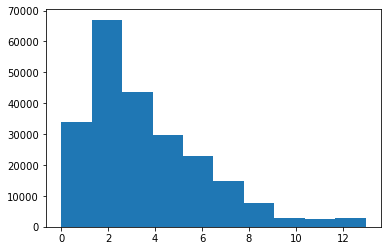

In [11]:
plt.hist( test['bsecDistance'] )

In [12]:
test['qcStatus'].unique()

array([1])